<a href="https://colab.research.google.com/github/SerasLain/infosearch_hw/blob/master/sem4_ML_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа
## Ранжирование с помощью ML


![](https://avatars.mds.yandex.net/get-research/1677227/2a00000168a82fc9b0eac19e430b8454a656/orig)


Одна из отличительных особенностей задачи ранжирования от классических задач машинного обучения заключается в том, что качество результата зависит не от предсказанных оценок релевантности, а от порядка следования документов в рамках конкретного запроса, т.е. важно не абсолютное значение релевантности (его достаточно трудно формализовать в виде числа), а то, более или менее релевантен документ, относительно других документов.

### Подходы к решению задачи ранжирования
Существуют 3 основных подхода к ранжированию, различие между которыми заключается в том, на какую функцию потерь они опираются:
  
1. **Поточечный подход (pointwise)**. В этом подходе предполагается, что каждой паре запрос-документ поставлена в соответствие численная оценка. Задача обучения ранжированию сводится к построению регрессии: для каждой отдельной пары запрос-документ необходимо предсказать её оценку.

2. **Попарный подход (pairwise)**. В таком подходе обучение ранжированию сводится к построению бинарного классификатора, которому на вход поступают два документа, соответствующих одному и тому же запросу, и требуется определить, какой из них лучше. Другими словами, функция потерь штрафует модель, если отранжированная этой моделью пара документов оказалась в неправильном порядке.

3. **Списочный подход (listwise)**. Его суть заключается в построении модели, на вход которой поступают сразу все документы, соответствующие запросу, а на выходе получается их перестановка.


Будем использовать самый простой подход - поточечный.

### Оценка качества

Для оценивания качества ранжирования найденных документов в поиске традиционно используется метрика *DCG* ([Discounted Cumulative Gain](https://en.wikipedia.org/wiki/Discounted_cumulative_gain)) и ее нормализованный вариант — *nDCG*, всегда принимающий значения от 0 до 1.

Для одного запроса DCG считается следующим образом:
$$ DCG(Q) = \sum_{i=1}^{numpos}\frac{(2^{rel_i} - 1)}{\log_2(i+1)}, $$
где
>$numpos$ — количество документов в поисковой выдаче, среди которых мы оценимваем качество (например, в предудыщих заданиях *num_pos* был равен 5)  
$rel_i$ — оценка релевантности документа, находящегося на i-той позиции   
   

Нормализованный вариант *nDCG* получается делением *DCG* на максимальное из его значений:

$$nDCG = \frac{DCG}{IDCG} \in [0, 1].$$
> *IDCG* — наибольшее из возможных значение *DCG* 






Чтобы оценить значение *nDCG* на выборке $Queries$ ($nDCG_{Queries}$) размера $N$, необходимо усреднить значение *nDCG* по всем запросам  выборки:
$$nDCG_{Queries} = \frac{1}{N}\sum_{q \in Queries}nDCG(q).$$

Пример реализации метрик ранжирование на python можно найти [здесь](https://gist.github.com/mblondel/7337391).

# Погнали
###  **Задача: предсказать оценку релевантности для запросов тестового датасета**


Мы будем работать на данных с конкурса [Интернет-математика 2009](https://academy.yandex.ru/events/data_analysis/grant2009/). По ссылке можно прочитать описание данных.      

Данные
> Данные разбиты на две выборки – обучающая выборка imat2009_learning.txt с известными оценками близости запроса и документа и тестовая выборка с неизвестными близостями imat2009_test.txt  

Обучающая выборка
> Данные для обучения содержат **97 290 строк**, которые соответствуют **9 124 запросам**  
Каждая строка соответствует паре «запрос-документ»    

Признаки
>Каждой паре «запрос-документ» соответствуют значения **245 признаков**. Формат хранения feat_num:value. Если значение признака равно 0, то он опускается.     
В комментариях в конце каждой строки указан **идентификатор запроса**.   
Файл с обучающей выборкой содержит **оценку релевантности**, значения из диапазона **[0, 4]** (4 – «высокая релевантность», 0 – «нерелевантно»).   


In [91]:
!wget "https://sun9-46.userapi.com/c851520/v851520155/763ba/iKNBViWyZAs.jpg"

--2019-10-17 21:57:19--  https://sun9-46.userapi.com/c851520/v851520155/763ba/iKNBViWyZAs.jpg
Resolving sun9-46.userapi.com (sun9-46.userapi.com)... 87.240.185.149
Connecting to sun9-46.userapi.com (sun9-46.userapi.com)|87.240.185.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 210163 (205K) [image/jpeg]
Saving to: ‘iKNBViWyZAs.jpg’

iKNBViWyZAs.jpg     100%[===================>] 205.24K  --.-KB/s    in 0.07s   

2019-10-17 21:57:21 (2.81 MB/s) - ‘iKNBViWyZAs.jpg’ saved [210163/210163]



<img src="/content/iKNBViWyZAs.jpg" style="height:300px">


### DATA

In [2]:
!wget "https://github.com/hse-infosearch/infosearch/blob/master/4%20ML%20ranking/imat2009_learning.txt.zip?raw=true"

--2019-10-17 20:02:24--  https://github.com/hse-infosearch/infosearch/blob/master/4%20ML%20ranking/imat2009_learning.txt.zip?raw=true
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/hse-infosearch/infosearch/raw/master/4%20ML%20ranking/imat2009_learning.txt.zip [following]
--2019-10-17 20:02:25--  https://github.com/hse-infosearch/infosearch/raw/master/4%20ML%20ranking/imat2009_learning.txt.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hse-infosearch/infosearch/master/4%20ML%20ranking/imat2009_learning.txt.zip [following]
--2019-10-17 20:02:25--  https://raw.githubusercontent.com/hse-infosearch/infosearch/master/4%20ML%20ranking/imat2009_learning.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.1

In [3]:
!unzip "imat2009_learning.txt.zip?raw=true"

Archive:  imat2009_learning.txt.zip?raw=true
  inflating: imat2009_learning.txt   
   creating: __MACOSX/
  inflating: __MACOSX/._imat2009_learning.txt  


In [4]:
!wget "https://raw.githubusercontent.com/hse-infosearch/infosearch/master/4%20ML%20ranking/metrics.py"

--2019-10-17 20:02:34--  https://raw.githubusercontent.com/hse-infosearch/infosearch/master/4%20ML%20ranking/metrics.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4914 (4.8K) [text/plain]
Saving to: ‘metrics.py’

metrics.py          100%[===================>]   4.80K  --.-KB/s    in 0s      

2019-10-17 20:02:34 (92.5 MB/s) - ‘metrics.py’ saved [4914/4914]



In [0]:
# LOAD TRAIN DATA
file_learning = 'imat2009_learning.txt'

with open(file_learning) as f:
    train_data = f.readlines()
    


In [4]:
len(train_data)

97290

Структура данных следующая - первый элемент в строке - это оценка близости запроса и документа, дальше идут признаки документа, а последний элемент строки - это id запроса:

> RELEVANCE      feature:value feature:value ... feature:value     # QUERY_ID

In [7]:
train_data[0]

'1 1:0.000023 7:0.704953 8:0.550315 9:0.032294 11:0.712631 14:0.015686 15:0.137255 16:0.302576 17:1.000000 18:0.996078 22:1.000000 23:1.000000 24:1.000000 27:0.700000 28:0.587629 29:0.999881 30:0.032294 34:0.000023 36:0.431373 37:0.002247 38:0.054902 41:1.000000 46:0.002247 50:0.032294 51:0.325613 52:0.056641 53:0.820677 54:0.388235 55:0.450980 56:0.312547 57:0.004672 59:1.000000 61:0.000023 65:1.000000 68:0.712195 69:0.001400 70:1.000000 71:0.001013 73:0.709459 74:0.560784 76:0.142857 77:0.360800 78:1.000000 79:1.000000 80:1.000000 82:0.000023 83:1.000000 85:0.996078 86:0.070588 87:1.000000 88:0.999797 92:1.000000 93:0.714286 95:0.039216 97:0.000023 98:0.356490 99:0.165041 102:1.000000 103:1.000000 104:1.000000 105:0.486275 108:0.152941 120:0.996078 121:0.676507 122:0.032294 126:0.712980 128:0.121569 129:0.609261 132:1.000000 134:0.109804 135:0.030535 140:0.002247 142:0.698039 144:0.248111 145:0.356490 146:1.000000 147:0.498039 148:0.125490 150:0.704953 151:1.000000 152:0.098039 154:0

В test_data все оценки релевантности скрыты, поскольку этот набор данных использовался для проверки качества работы алгоритма в конкурсе. Нам эти данные не нужны, дальше работаем только с **train_data**.

Для проверки качества будущей модели надо разбить обучающую выборку на обучение и валидацию в соотношении 70 / 30

Внимание: разбивать необходимо **множество запросов QUERY_ID**, а не строчки датасета, чтобы в выборке находилась вся информация по запросу

Для этого вам надо:
1. собрать все запросы для каждого QUERY_ID

```
{
query_id : [
    RELEVANCE feature:value ... feature:value,
    ...
],
...
}
```

При этом я бы сразу собирала не сами данные, а номер строки в матрице данных
```
{
query_id : [
    line_num, line_num, ... line_num
],
...
}
```
2. собрать матрицу данных, размер вектора равен числу признаков = 245
```
data = np.zeros((len(train_data), feats_num), dtype=np.float32) 
```

3. собрать вектор с оценками релевантности, его размер равен размеру train_data

In [0]:
import numpy as np
from collections import defaultdict

labels = [] 
queries_lines_info = defaultdict(list) 
data = np.zeros((len(train_data), 245), dtype=np.float32)

for i, line in enumerate(train_data):
    info = line.strip('\n').split(' ')
    labels.append(float(info[0]))
    values =[f.split(':') for f in info[1:-2]]
    query = int(info[-1])

    queries_lines_info[query].append(i)
    for column, value in values:
        data[i, int(column) - 1] = float(value)


In [44]:
assert data.shape == (len(train_data), 245)
assert len(queries_lines_info.keys()) == 9124
assert len(labels) == len(train_data)
print('OK!')

OK!


Разделим запросы из *queries_lines_info.keys()* на обучающую *train_queries_ids* и валидационную выборки *test_queries_ids* (70/30)

In [0]:
from sklearn.model_selection import train_test_split

queries_id_train, queries_id_test = train_test_split(list(queries_lines_info.keys()), test_size=0.3, random_state=42)

In [0]:
# check
assert len(queries_id_train) / (len(queries_id_train) + len(queries_id_test)) == 0.6999123191582639

 > Теперь у нас есть:  
 1) айдишники запросов для обучения и валидации **queries_id_train, queries_id_test**   
 2) матрица данных **data**   
 3) словарь **queries** с информацией о том, какие строчки в этой матрице соответствуют какому айдишнику  
 
 С помощью этих данных разделите матрицу data на матрицы **X_train, y_train, X_test, y_test**

In [113]:
# изи пизи способ получить несколько строк матрицы по их id данные матрицы
data_example = np.array(
    [
        [0, 0, 0],
        [1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]
    ]
)

data_example[[0, 3]]

array([[0, 0, 0],
       [3, 3, 3]])

In [0]:
# разбиваем номера строк исходной матрицы на train и test

train_queries_lines_info = []
for i in queries_id_train:
    train_queries_lines_info += queries_lines_info[i]

test_queries_lines_info = []
for i in queries_id_test:
    test_queries_lines_info += queries_lines_info[i]



In [0]:
labels = np.array(labels)
train_queries_lines_info = np.array(train_queries_lines_info)
test_queries_lines_info = np.array(test_queries_lines_info)

In [10]:
X_train, X_test = data[train_queries_lines_info], data[test_queries_lines_info]
y_train, y_test = labels[train_queries_lines_info], labels[test_queries_lines_info] 
X_train.shape, y_train.shape

((68418, 245), (68418,))

In [11]:
assert X_train.shape == (68418, 245) 
assert len(y_train) == 68418

print('OK!')

OK!


Поздравляю, если вы все сделали до этого моменты, вы восхитительны! 

Данные готовы, можно заряжать модели                                                           
Для оценивания качества моделей используйте метрику nDCG, реализованную ниже

In [0]:
import metrics


def get_nDCG_score(queries, queries_lines_info, test_queries_lines_info, labels_true, labels_predicted):
    nDCG_scores = [] # nDCG по каждому запросу
    
    for query in queries:
        
        query_lines = queries_lines_info[query]
        query_lines_in_testdata = [np.where(test_queries_lines_info==line)[0][0] for line in query_lines]
        
        query_labels_true = labels[query_lines]
        query_labels_pred = labels_predicted[query_lines_in_testdata]
        
        nDCG = metrics.ndcg_score(query_labels_true, query_labels_pred, k=10)
        nDCG_scores.append(nDCG)
        
    nDCG_Queries = np.sum(nDCG_scores) / len(queries) # усредняем по всем запросам
    return nDCG_Queries


### FIT PREDICT

Воспользовавшись известными вам техниками построения линейной регрессии, обучите модель, предсказывающую оценку асессора

``` from sklearn.linear_model import LinearRegression``` 

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
lin_reg = LinearRegression()

gs_lr = GridSearchCV(lin_reg, {'fit_intercept': [True, False], 'normalize':[True, False]}, cv=5)
gs_lr.fit(X_train, y=y_train)


lin_reg_y_pred = gs_lr.best_estimator_.predict(X_test)

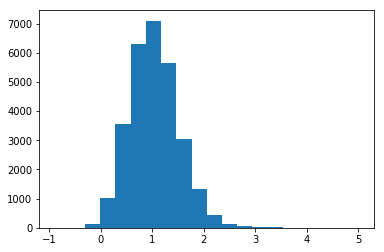

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

h = plt.hist(lin_reg_y_pred, bins=20)

In [80]:
lin_reg_y_pred.shape

(28872,)

In [0]:
y_test = [float(i) for i in y_test]

In [78]:
lin_reg_y_pred

array([1.6630007, 2.1945872, 1.3478256, ..., 0.9766481, 0.2451429,
       0.7840549], dtype=float32)

Посчитаем качество модели по метрике **nDCG**

In [79]:
import numpy

score_lin_reg = get_nDCG_score(
    queries = queries_id_test, 
    queries_lines_info = queries_lines_info, 
    test_queries_lines_info = test_queries_lines_info, 
    labels_true = y_test, 
    labels_predicted = lin_reg_y_pred
)
 
score_lin_reg

0.828374168857091

Давайте теперь решим эту задачу не как регрессию, а как классификацию

А давайте нет? Дело в том, что для того, чтобы представить это как задачу классификации, придется искусственно классифицировать лейблы. Сейчас список лейблов выглядит так:

In [104]:
print(len(set(labels)))

set(labels)

78


{0.0,
 0.125,
 0.166671,
 0.2,
 0.222229,
 0.25,
 0.333329,
 0.4,
 0.5,
 0.583329,
 0.6,
 0.666671,
 0.714286,
 0.75,
 0.8,
 0.833329,
 0.875,
 0.888886,
 1.0,
 1.14286,
 1.16667,
 1.2,
 1.25,
 1.33333,
 1.4,
 1.5,
 1.6,
 1.66667,
 1.75,
 1.77143,
 1.8,
 1.83333,
 1.95239,
 1.97143,
 2.0,
 2.0463,
 2.05556,
 2.07407,
 2.0963,
 2.11729,
 2.12037,
 2.12346,
 2.16049,
 2.16667,
 2.18519,
 2.2,
 2.24074,
 2.24691,
 2.25,
 2.33333,
 2.34815,
 2.37037,
 2.375,
 2.4,
 2.40741,
 2.42857,
 2.5,
 2.58025,
 2.61111,
 2.66667,
 2.74074,
 2.75,
 2.85714,
 2.87037,
 2.91358,
 3.0,
 3.1625,
 3.21666,
 3.25,
 3.33333,
 3.4,
 3.5,
 3.53,
 3.58125,
 3.66667,
 3.75,
 3.8,
 4.0}

Во-первых, у нас 72 класса — это очень много для классификации. Во-вторых, сейчас данные больше похожи на что-то непрерывное — повод использовать регрессию, а не классификацию.

In [0]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train) 


#### Ранжируем с RandomForestRegressor

In [93]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
gs_rf = GridSearchCV(rf, {'max_depth':[8, None]}, cv=5)
gs_rf.fit(X_train, y=y_train)


labels_predicted_rf = gs_rf.best_estimator_.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [95]:
gs_rf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [96]:
score_rf = get_nDCG_score(
    queries = queries_id_test, 
    queries_lines_info = queries_lines_info, 
    test_queries_lines_info = test_queries_lines_info, 
    labels_true = y_test, 
    labels_predicted = labels_predicted_rf
)
 
score_rf

0.8323207796046446

#### Ранжируем с XGBoost

In [0]:
import xgboost as xgb
# read in data
# dtrain = xgb.DMatrix(X_train)
# dtest = xgb.DMatrix(X_test)
# specify parameters via map
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
depth = range(5, 10)
results = []
for i in depth:
    param = {'max_depth': i}
    num_round = 2
    bst = xgb.train(param, dtrain, num_round)
    preds = bst.predict(dtest)
    score_xgb = get_nDCG_score(
        queries = queries_id_test, 
        queries_lines_info = queries_lines_info, 
        test_queries_lines_info = test_queries_lines_info, 
        labels_true = y_test, 
        labels_predicted = preds
        )
    results.append((i, score_xgb))




In [67]:
for depth, score in results:
    print('При максимальной глубине {0} score {1}'.format(depth, score))

При максимальной глубине 5 score 0.8186096850795688
При максимальной глубине 6 score 0.820581144976179
При максимальной глубине 7 score 0.8247841812356328
При максимальной глубине 8 score 0.8254303627044434
При максимальной глубине 9 score 0.8233549584713931


Как видно, лучший результат на глубине 8.

Попробуем другую модель?

In [68]:
param = {'max_depth': 8, 'objective':'rank:pairwise'}
num_round = 2
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)
score_xgb = get_nDCG_score(
    queries = queries_id_test, 
    queries_lines_info = queries_lines_info, 
    test_queries_lines_info = test_queries_lines_info, 
    labels_true = y_test, 
    labels_predicted = preds
    )
    
score_xgb

0.8175462144248398

Ну, от добра добра не ищут (хотя можно сделать gridsearch и подобрать хорошие параметры)

#### Ранжируем с LightGBM

In [0]:
import lightgbm

dtrain = lightgbm.Dataset(X_train, label=y_train)
dtest = lightgbm.Dataset(X_test, label=y_test)

lgbm = lightgbm.train({'num_leaves':70, 'max_depth':8}, dtrain)

In [0]:
labels_predicted_lgbm = lgbm.predict(X_test)

In [99]:
score_lgbm = get_nDCG_score(
    queries = queries_id_test, 
    queries_lines_info = queries_lines_info, 
    test_queries_lines_info = test_queries_lines_info, 
    labels_true = y_test, 
    labels_predicted = labels_predicted_lgbm
    )
    
score_lgbm

0.8521957028509198

LightGBM победил, расходимся.